In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gdown
from wordcloud import WordCloud, STOPWORDS

In [5]:
url = 'https://drive.google.com/uc?id=1nONpng5xOXNr2kK-bdtLL4RsaingezVK'  
dataset = 'Reviews.csv'

# Descargar el archivo CSV
gdown.download(url, dataset, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1nONpng5xOXNr2kK-bdtLL4RsaingezVK
From (redirected): https://drive.google.com/uc?id=1nONpng5xOXNr2kK-bdtLL4RsaingezVK&confirm=t&uuid=4e6d0561-6d98-482c-8755-e98d90817c07
To: C:\Users\swamt\OneDrive\Escritorio\clases2doS\BI\s6\Reviews.csv
100%|███████████████████████████████████████████████████████████████████████████████| 301M/301M [02:34<00:00, 1.94MB/s]


'Reviews.csv'

In [7]:
df = pd.read_csv(dataset)

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
#Variales importantes serán Text, Summary y Score
#crearemos el contador de registros para Score

score_counts = df['Score'].value_counts().sort_index()
score_counts.head()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Text(0, 0.5, 'Count')

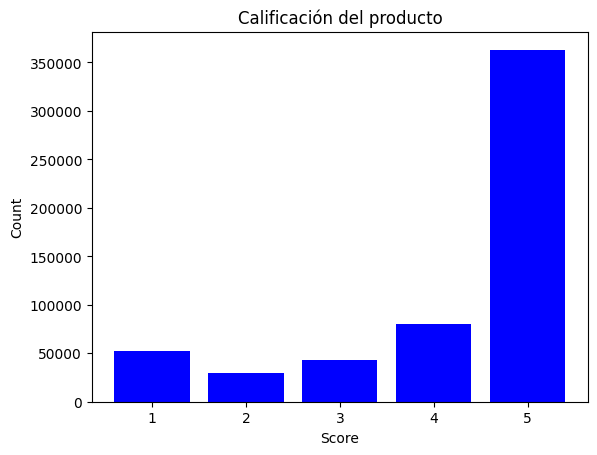

In [12]:
#Gráfico de barras para determinar la mayoría de ratings

plt.bar(score_counts.index, score_counts.values, color='blue')
plt.title('Calificación del producto')
plt.xlabel('Score')
plt.ylabel('Count')

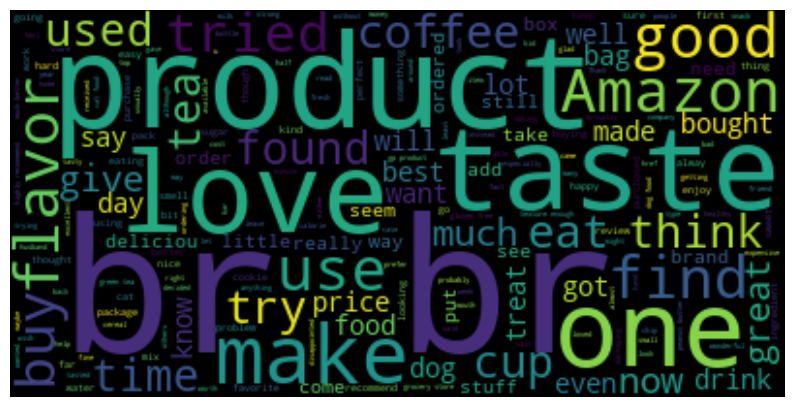

In [32]:
#Generación del WordCloud con la mayor frecuencia de palabras en las reseñas de los productos

wordcloud = WordCloud().generate(' '.join(df['Text']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
#Proceso de clasificación de scores en nueva columna de sentimiento

#el primer paso es remover las opniniones neutrales
df_filtered = df[df['Score'] != 3]

#creación de la columna sentimiento
df_filtered['sentiment'] = df_filtered['Score'].apply(lambda x: +1 if x > 3 else -1)

df_filtered.head()

C:\Users\swamt\AppData\Local\Temp\ipykernel_13488\4057443784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment'] = df_filtered['Score'].apply(lambda x: +1 if x > 3 else -1)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


In [ ]:
#Proceso de Wordclouds segmentados en dependencia de la negatividad o positividad de la reseña

def positive_wordcloud(df, col, sentiment_col):
    #generamos el dataframe positivo
    df_positive = df[df[sentiment_col] == 1]

    #le pasamos el texto de la reseña a cada wordcloud
    positive_txt = ' '.join(df_positive[col].dropna().astype(str))
    positive_wordcloud = WordCloud().generate(positive_txt)

    plt.figure(figsize=(10, 8))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('WordCloud para Reseñas Positivas')
    plt.axis('off')

    plt.show()
    
positive_wordcloud(df_filtered,'Text','sentiment')

In [ ]:

def negative_wordcloud(df, col, sentiment_col):
    df_negative = df[df[sentiment_col] == -1]

    negative_txt = ' '.join(df_negative[col].dropna().astype(str))
    negative_wordcloud = WordCloud().generate(negative_txt)

    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('WordCloud para Reseñas Negativas')
    plt.axis('off')
    plt.show()

negative_wordcloud(df_filtered,'Text','sentiment')